In [1]:
import nesdis_gml_synergy.satlab as ngs
import nesdis_gml_synergy.cloud_interface as ngsci

In [2]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf

# download the satellite data

In [22]:
path2fld_sat=pl.Path('/export/htelg/tmp/sm20201015/')
path2fld_fig = pl.Path('/export/htelg/tmp/sm20201015figs/')
path2fld_movies = pl.Path('/export/htelg/tmp/satellietmovies/')

start='2020-10-16 13:20:00'
end='2020-10-17 00:00:00'

path2fld_movies.mkdir(exist_ok=True)
path2fld_sat.mkdir(exist_ok=True)

In [23]:
query = ngsci.AwsQuery(path2folder_local=path2fld_sat,
                satellite='16',
                sensor='VIIRS',
                product='ABI-L2-MCMIP',
                scan_sector='C',
                start=start,
                end=end,
                # start='2020-10-15 15:00:00',
                # end='2020-10-15 15:05:00',
                site=None,
                process=None,
                keep_files=None,
                verbose=False,
                overwrite=False,)

In [24]:
query.workplan.iloc[50].path2file_local

PosixPath('/export/htelg/tmp/sm20201015/OR_ABI-L2-MCMIPC-M6_G16_s20202901731141_e20202901733520_c20202901734081.nc')

In [26]:
# self = ngs.open_file(query.workplan.iloc[50].path2file_local)

In [27]:
# self.plot_true_color()

In [28]:
query.download()

[None]

In [20]:
# ds = ngs.open_file(query.workplan.iloc[0].path2file_local)

# improve images

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [29]:
# path2fld_fig.mkdir()
# path2fld_movies.mkdir()
mov = ngs.SatelliteMovie(path2fld_sat=path2fld_sat,
                         path2fld_fig=path2fld_fig,
                         path2fld_movies=path2fld_movies,
                        )

In [30]:
mov.workplan = mov.workplan.truncate(start, end)

In [31]:
# self = ngs.open_file(mov.workplan.iloc[40].path2sat)

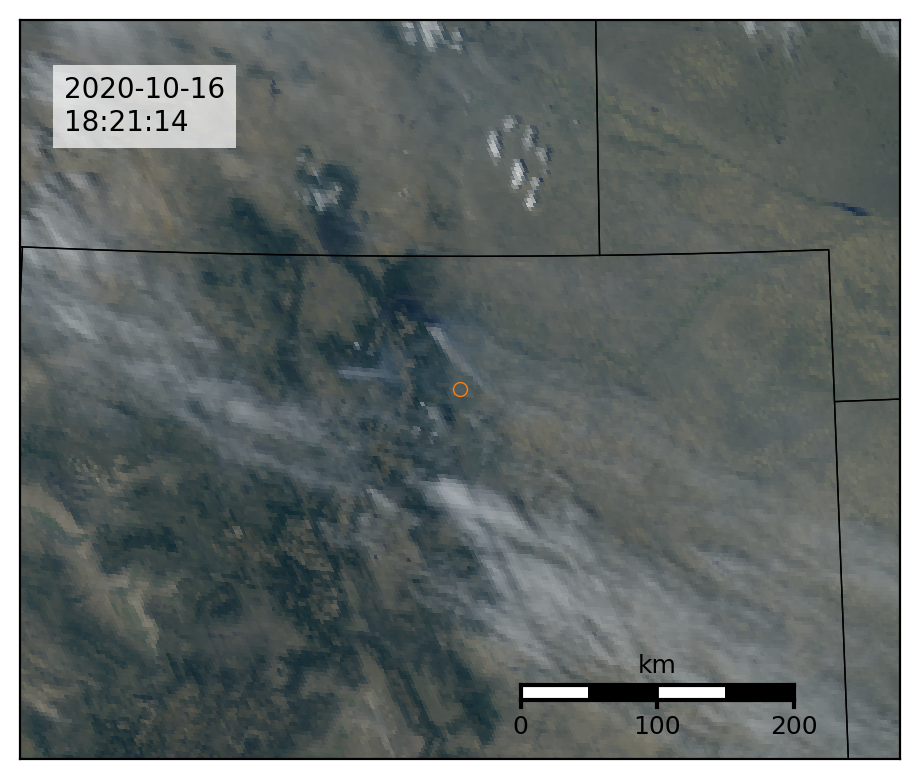

In [32]:
zoom = 7
width=4500000.0/zoom
height=2700000.0/zoom*1.4
lat=atmsrf.network.stations.Table_Mountain.lat
lon=atmsrf.network.stations.Table_Mountain.lon
# sfrac = 3

bmap = mov.plot_single(resolution='c',
                width=width,
                height=height,
                lat_0 = lat,
                lon_0 = lon,
                costlines=True,
                row=60,
                sites=atmsrf.network.stations.Table_Mountain,
                gamma=2.3,
                contrast=200,
                first=True,
                save=True,
                dpi=300,
                overwrite=True,
                use_active_settings=False,)


# None

Number of files to process: 127


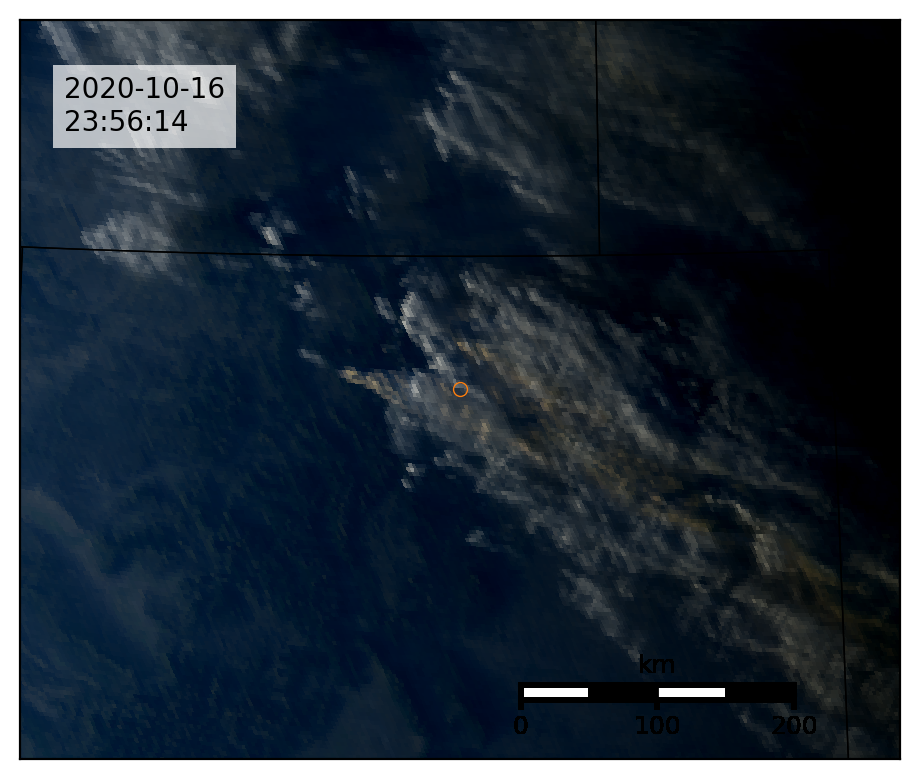

In [33]:
mov.create_images(overwrite=False)

In [34]:
mov.create_movies(overwrite=False)

ffmpeg version 5.1.3 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 11 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-D_FORTIFY_SOURCE=2 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64-v2 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 ' --extra-cflags=' -I/usr/include/rav1e' --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libvo-amrwbenc --enable-version3 --enable-bzlib --enable-chromap

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1927: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, channels_rgb['red'], color=colortuple, linewidth=0, latlon=True, **kwargs)


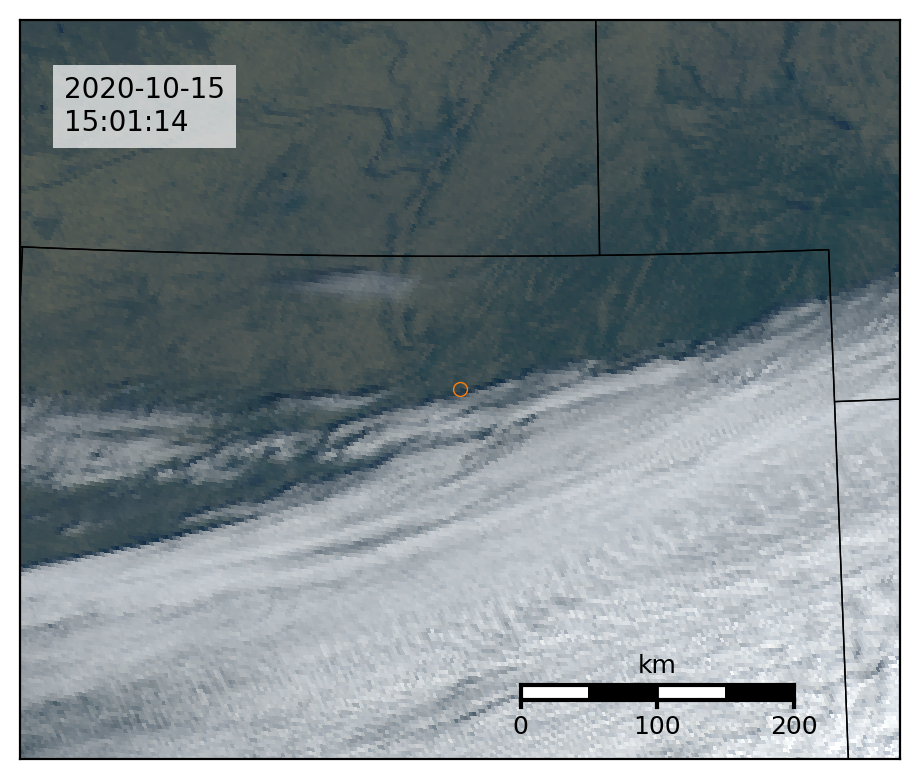

In [54]:
zoom = 7
width=4500000.0/zoom
height=2700000.0/zoom*1.4
lat=atmsrf.network.stations.Table_Mountain.lat
lon=atmsrf.network.stations.Table_Mountain.lon
sfrac = 3

bmap = mov.plot_single(resolution='c',
                width=width,
                height=height,
                lat_0 = lat,
                lon_0 = lon,
                costlines=True,
                row=1,
                sites=atmsrf.network.stations.Table_Mountain,
                first=True,
                save=True,
                dpi=300,
                overwrite=True,
                use_active_settings=False,)

rel_x = 0.7  # 10% from the left
rel_y = 0.1  # 10% from the bottom

lon = bmap.llcrnrlon + rel_x * (bmap.urcrnrlon - bmap.llcrnrlon)
lat = bmap.llcrnrlat + rel_y * (bmap.urcrnrlat - bmap.llcrnrlat)

sw = int(width/sfrac/100000) * 100
bmap.drawmapscale(lon, lat, lon, lat, sw, barstyle='fancy', units='km', 
                  # fontsize=9, 
                  # yoffset=20000,
                 )
None

/export/htelg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:1927: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = bmap.pcolormesh(lons, lats, channels_rgb['red'], color=colortuple, linewidth=0, latlon=True, **kwargs)


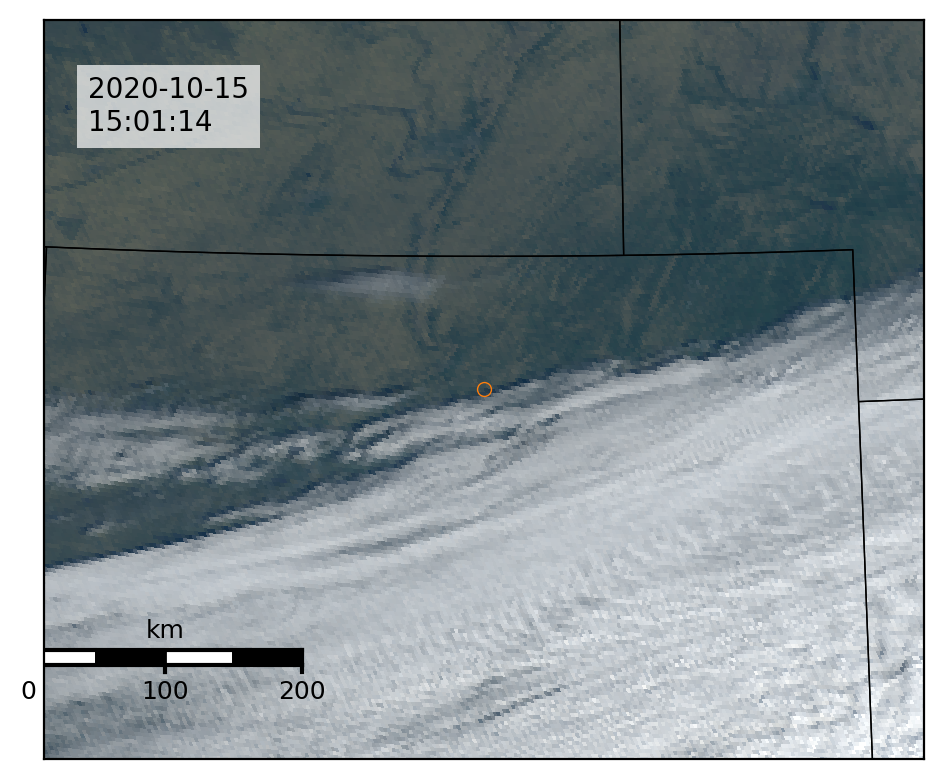

In [40]:
zoom = 7
width=4500000.0/zoom
height=2700000.0/zoom*1.4
lat=atmsrf.network.stations.Table_Mountain.lat
lon=atmsrf.network.stations.Table_Mountain.lon
bmap = mov.plot_single(resolution='c',
                width=width,
                height=height,
                lat_0 = lat,
                lon_0 = lon,
                costlines=True,
                row=1,
                sites=atmsrf.network.stations.Table_Mountain,
                first=True,
                save=True,
                dpi=300,
                overwrite=True,
                use_active_settings=False,)
a = plt.gca()
x0, y0 = a.transAxes.transform((100, 100))  # This gives pixel coordinates
lon, lat = bmap(x0, y0, inverse=True)

sw = int(width/3/100000) * 100
bmap.drawmapscale(lon, lat, lon, lat, sw, barstyle='fancy', units='km', 
                  # fontsize=9, 
                  # yoffset=20000,
                 )
None

In [31]:
int(width/3/100000) * 100

200

In [1]:
mov.create_movies()

NameError: name 'mov' is not defined

In [2]:
import ffmpeg

input_file = '/export/htelg/tmp/satellietmovies/_2020_10_15.txt'
output_file = '/export/htelg/tmp/satellietmovies/_2020_10_15.mp4'

(
    ffmpeg
    .input(input_file, r=5, f='concat', safe=0)
    .output(output_file)
    .run()
)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

In [1]:
ffmpeg

NameError: name 'ffmpeg' is not defined